In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [150]:
df=pd.read_csv("medical.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [151]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [152]:
cat=df[["sex","smoker","region"]]

In [153]:
df1=pd.get_dummies(df,list(cat.columns))
df1.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [154]:
cat2=df1[['sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]

In [155]:
l1=list(cat2.columns)

In [156]:
l1

['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [157]:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [158]:
l2=[]
for i in range(0,len(cat2.columns)):
    pred=cat2.columns[i]
    new=ols("charges~"+cat2.columns[i],data=df1).fit()
    an=sm.stats.anova_lm(new,typ=2)
    
    if an.loc[pred]["PR(>F)"]<0.05:
        l2.append(pred)
        
        
print(l2)

['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_southeast']


In [159]:
cont=df1[['age', 'bmi', 'children', 'charges']]

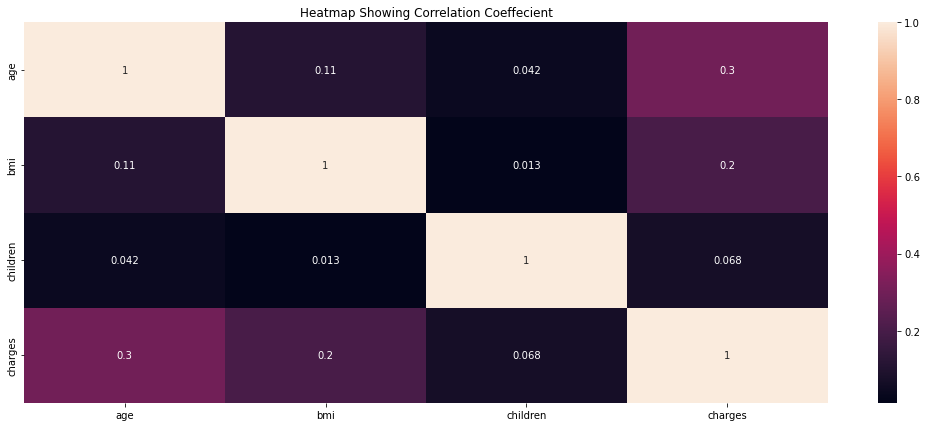

In [160]:
plt.figure(figsize=(18,7))
sns.heatmap(df1[['age', 'bmi', 'children', 'charges']].corr(),annot=True)
plt.title("Heatmap Showing Correlation Coeffecient")

plt.show()

In [161]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
cont_sc=sc.fit_transform(cont)
print(pd.DataFrame(cont_sc))

             0         1    2         3
0     0.021739  0.321227  0.0  0.251611
1     0.000000  0.479150  0.2  0.009636
2     0.217391  0.458434  0.6  0.053115
3     0.326087  0.181464  0.0  0.333010
4     0.304348  0.347592  0.0  0.043816
...        ...       ...  ...       ...
1333  0.695652  0.403820  0.6  0.151299
1334  0.000000  0.429379  0.0  0.017305
1335  0.000000  0.562012  0.0  0.008108
1336  0.065217  0.264730  0.0  0.014144
1337  0.934783  0.352704  0.0  0.447249

[1338 rows x 4 columns]


In [162]:
df1["age"]=pd.DataFrame(cont_sc)[0]
df1["bmi"]=pd.DataFrame(cont_sc)[1]
df1["children"]=pd.DataFrame(cont_sc)[2]
df1["charges"]=pd.DataFrame(cont_sc)[3]

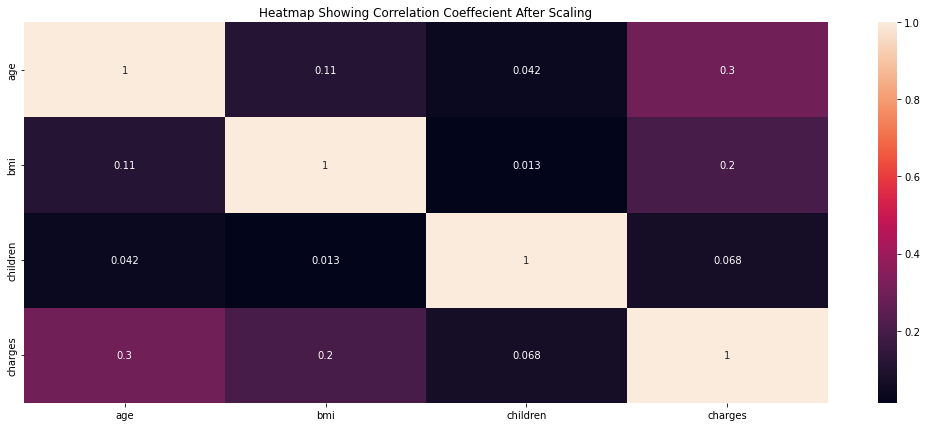

In [163]:
plt.figure(figsize=(18,7))
sns.heatmap(df1[['age', 'bmi', 'children', 'charges']].corr(),annot=True)
plt.title("Heatmap Showing Correlation Coeffecient After Scaling")

plt.show()

In [164]:
df1[['age', 'bmi', 'children', 'charges']]

,age,bmi,children,charges
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816
...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108
1336,0.065217,0.264730,0.0,0.014144


In [165]:
cont_isc=sc.inverse_transform(cont_sc)

In [166]:
print(pd.DataFrame(cont_isc))

         0       1    2            3
0     19.0  27.900  0.0  16884.92400
1     18.0  33.770  1.0   1725.55230
2     28.0  33.000  3.0   4449.46200
3     33.0  22.705  0.0  21984.47061
4     32.0  28.880  0.0   3866.85520
...    ...     ...  ...          ...
1333  50.0  30.970  3.0  10600.54830
1334  18.0  31.920  0.0   2205.98080
1335  18.0  36.850  0.0   1629.83350
1336  21.0  25.800  0.0   2007.94500
1337  61.0  29.070  0.0  29141.36030

[1338 rows x 4 columns]


In [167]:
df1["age"]=pd.DataFrame(cont_isc)[0]
df1["bmi"]=pd.DataFrame(cont_isc)[1]
df1["children"]=pd.DataFrame(cont_isc)[2]
df1["charges"]=pd.DataFrame(cont_isc)[3]

In [168]:
l3=["age","bmi","children"]

In [169]:
l3.extend(l1)

In [170]:
l3

['age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [171]:
from sklearn.model_selection import train_test_split
x=df1[l3]
y=df1["charges"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [172]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train)
pca_data=pca.transform(x_train)

In [173]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)

In [174]:
loading_scores=pd.Series(pca.components_[0],index=x_train.columns)

In [175]:
loading_scores.abs().sort_values(ascending=False)

age                 0.998479
bmi                 0.054831
children            0.005325
smoker_no           0.001337
smoker_yes          0.001337
sex_female          0.000463
sex_male            0.000463
region_southwest    0.000460
region_southeast    0.000409
region_northeast    0.000400
region_northwest    0.000348
dtype: float64

# Although 'age', 'bmi' & 'children' does not have significant correlation coefficients, PCA shows that these three captures highest variation in the target variable 'charges'

# Selecting variables based on PCA scores & Anova test. Note that we have selected 'region_southeast' based on the Anova Test

In [208]:
l4=["age","bmi","children","smoker_no","sex_female","region_southeast"]
x=df1[l4]
y=df1["charges"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=12)

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [210]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
metrics.r2_score(y_test.values,y_pred)

0.7079068884200326

In [196]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)

In [211]:
rf.fit(x_train,y_train)
ans=rf.predict(x_test)
metrics.r2_score(y_test.values,ans)

0.8138940681945712